# 🚗 Car Price Prediction using Linear Regression
A simple ML project to predict car prices based on mileage using scikit-learn.  
Dataset is synthetically generated for learning purposes.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression

## 📊 Generate Dataset
Simulating 100 cars with varying mileages and corresponding prices (with noise).

In [8]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 100 random mileages (5,000 to 200,000 km)
mileages = np.random.randint(5000, 200000, 100)

# Create prices: decrease with mileage + some noise
prices = 30000 - (mileages * 0.1) + np.random.normal(0, 1500, 100)

# Make sure prices aren’t negative
prices = np.maximum(prices, 1000)

# Create a DataFrame
df = pd.DataFrame({
    'mileage': mileages,
    'price': prices.round(2)
})
    
# Show the first 5 rows
df.head()

,mileage,price
0,126958,18700.08
1,151867,15829.95
2,136932,17354.46
3,108694,19391.00
4,124879,18505.53


## 🎨 Visualize Mileage vs Price
Plotting the relationship to confirm it follows a downward linear trend.

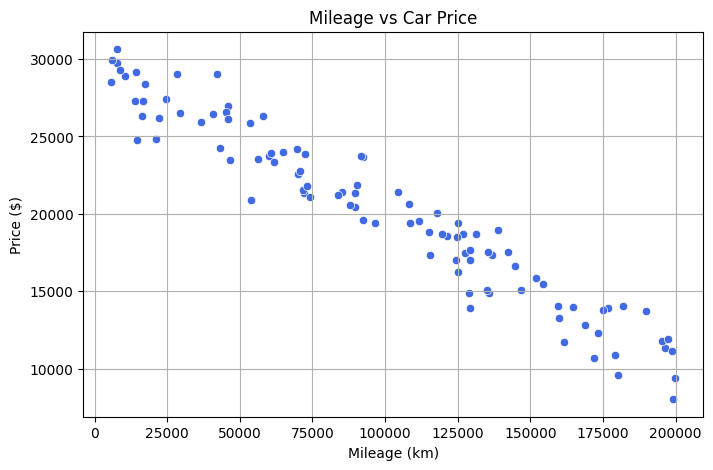

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='mileage', y='price', color='royalblue')
plt.title('Mileage vs Car Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


## 🧠 Train Linear Regression Model
Splitting data and training a linear regression model with scikit-learn.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into features (X) and target (y)
X = df[['mileage']]  # Must be 2D
y = df['price']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 🧪 Evaluate Model
Checking how well the model performs on test data using RMSE and R².

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict car prices using the test set
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"🔍 Model Evaluation:")
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📊 R² Score: {r2:.4f}")



🔍 Model Evaluation:
📉 Mean Squared Error (MSE): 2369503.13
📈 Root Mean Squared Error (RMSE): 1539.32
📊 R² Score: 0.9409


## 🔮 Predict Price Based on Mileage
Try entering any mileage to see the model's predicted price.

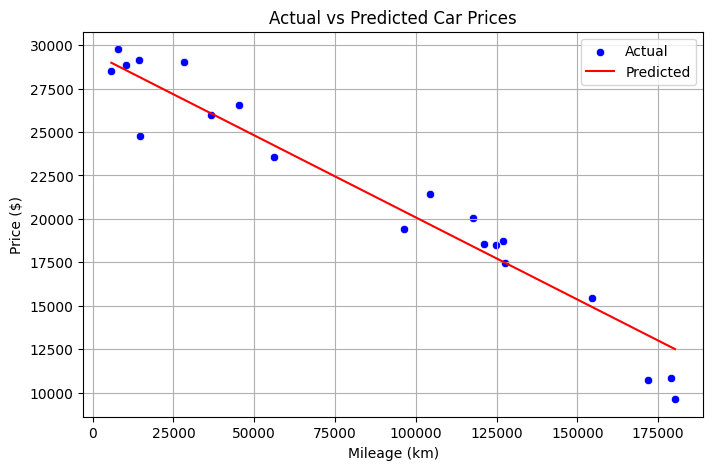

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['mileage'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['mileage'], y=y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Mileage (km)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# Ask for a new mileage input
new_mileage = 50000  # Change this number to test different mileages

# Put it into a DataFrame (with the correct column name)
input_df = pd.DataFrame({'mileage': [new_mileage]})

# Predict
predicted_price = model.predict(input_df)

# Show result
print(f"Estimated price for a car with {new_mileage} km mileage: ${predicted_price[0]:.2f}")


Estimated price for a car with 50000 km mileage: $24808.95


In [30]:
# Show the model's learned coefficients
print(f"Model Equation: price = {model.coef_[0]:.2f} * mileage + {model.intercept_:.2f}")


Model Equation: price = -0.09 * mileage + 29533.92


## 🧾 Model Equation
This shows the mathematical formula the model learned.